In [103]:
#Script Purpose: Plot IV curve in upward, downward and average of the two
#Takes in .fcd file from Scribner software
#Author: Shan Kutagulla

In [104]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import openpyxl
import numpy as np
import scipy
import os  

In [105]:
AREA=25; #area of MEA in cm2
title="NC700 Baseline 02172022 Pol Curve"

In [106]:
#administrative stuff: read in data and index
filename="/Users/shanmukhkutagulla/My Drive/Fuel Cell Docs/Bare Nafion Control Baselines/Nafion bare 02172022/NC700_Baseline_02172022_PolCurve.fcd"
data=pd.read_csv(filename, skiprows=49, delimiter="\t", usecols=["E_Stack (V)","I (A)"])
data=data.drop(0,axis=0).reindex()

In [107]:
#Normalize data for area of cell and determine the turnpoint in dataset of voltage
data["I (A/cm2)"]=data["I (A)"]/AREA
turnpoint=data["E_Stack (V)"].idxmin()

In [108]:
#extract each sweep direction
downwards_pol=data.iloc[0:turnpoint]
downwards_pol=downwards_pol.reset_index(drop=True)

#for upwards, have to reindex, flip to make compatible for averaging and reset index once more
upwards_pol=data.iloc[turnpoint-1::]
upwards_pol=upwards_pol.reset_index(drop=True)
upwards_pol=upwards_pol.reindex(index=upwards_pol.index[::-1])
upwards_pol=upwards_pol.reset_index(drop=True)

#average the directions
average_pol=((downwards_pol+upwards_pol)/2).dropna()


Text(0.5, 1.0, 'NC700 Baseline 02172022 Pol Curve')

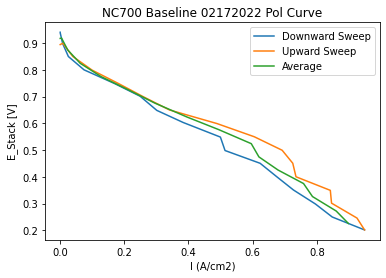

In [109]:
#plot and label graph
down_line=plt.plot(downwards_pol["I (A/cm2)"],downwards_pol["E_Stack (V)"])
up_line=plt.plot(upwards_pol["I (A/cm2)"],upwards_pol["E_Stack (V)"])
average_line=plt.plot(average_pol["I (A/cm2)"],average_pol["E_Stack (V)"])
plt.legend(['Downward Sweep','Upward Sweep', 'Average']);
plt.xlabel("I (A/cm2)");
plt.ylabel("E_Stack [V]");
plt.title(title)

Text(0.5, 1.0, 'NC700 Baseline 02172022 Pol Curve')

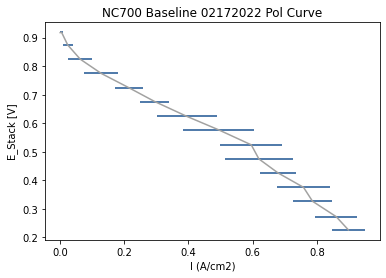

In [110]:
#Plots average pol curve with error bars
x_error=(average_pol["I (A/cm2)"]-downwards_pol["I (A/cm2)"]).dropna(axis=0)
error_bar_avg=plt.errorbar(average_pol["I (A/cm2)"],average_pol["E_Stack (V)"],xerr=x_error, ecolor="#195190FF", color="#A2A2A1FF")
plt.xlabel("I (A/cm2)");
plt.ylabel("E_Stack [V]");
plt.title(title)

In [111]:
#This module is to export to a csv
#create Dataframe of all data for future use for comparison files
dataset_export=pd.DataFrame()
dataset_export["Upwards Pol I (A/cm2)"]=upwards_pol["I (A/cm2)"]
dataset_export["Upwards Pol E_Stack (V)"]=upwards_pol["E_Stack (V)"]
dataset_export["Downwards Pol I (A/cm2)"]=downwards_pol["I (A/cm2)"]
dataset_export["Downwards Pol E_Stack (V)"]=downwards_pol["E_Stack (V)"]
dataset_export["Average Pol I (A/cm2)"]=average_pol["I (A/cm2)"]
dataset_export["Average Pol E_Stack (V)"]=average_pol["E_Stack (V)"]
dataset_export["Average Upwards X Error"]=x_high_err
dataset_export["Average Downwards X Error"]=x_low_err

os.makedirs('/Users/shanmukhkutagulla/My Drive/Fuel Cell Docs/Pol Curve Processed Files', exist_ok=True)
path='/Users/shanmukhkutagulla/My Drive/Fuel Cell Docs/Pol Curve Processed Files/'+title+'.pol'
dataset_export.to_csv(path,index=False)